In [1]:
# Clone repo
!git clone 'https://github.com/ife-dolapo/Unsupervised-Learning-tasks.git'

Cloning into 'Unsupervised-Learning-tasks'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [7]:
# Dataset Selection and Preprocessing
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Unzip dataset
zip_path = '/content/glass+identification.zip'
extract_dir = '/content/glass_data'

# Create the folder to store the file
os.makedirs(extract_dir, exist_ok=True)

#Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extracted files:")
print(os.listdir(extract_dir))

# Load glass.data into a DataFrame
column_names = ['Id','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
glass_data_df = pd.read_csv('/content/glass_data/glass.data',
                         header=None,
                         names=column_names)

glass_data_df.drop(columns=['Id'], inplace=True)
glass_data_df.head()


Extracted files:
['glass.tag', 'glass.names', 'glass.data', 'Index']


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
# Configure git
!git init
!git config --global user.email "ifedolapootiko@gmail.com"
!git config --global user.name "ife-dolapo"

Reinitialized existing Git repository in /content/.git/


In [18]:
# Add to github
!git add 'glass_data/'
!git commit -m "Add glass dataset"

[master (root-commit) 965f960] Add glass dataset
 4 files changed, 341 insertions(+)
 create mode 100644 glass_data/Index
 create mode 100644 glass_data/glass.data
 create mode 100644 glass_data/glass.names
 create mode 100644 glass_data/glass.tag


In [13]:
# Preprocess the data
print(glass_data_df.isnull().sum())
print("\nSummary of the dataset")
print(glass_data_df.describe())
print("\nInfo of the dataset")
print(glass_data_df.info)



RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Duplicates:
0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

Summary of the dataset
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4

In [22]:
# Standardizing and Normalizing the features
from sklearn.preprocessing import StandardScaler, PowerTransformer # This is to help with skewed features like K, Ba, Fe
# features and target
X = glass_data_df.drop(columns=['Type'])
y = glass_data_df['Type']

# Handle skewed features
pt = PowerTransformer()
X_transformed = pt.fit_transform(X)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

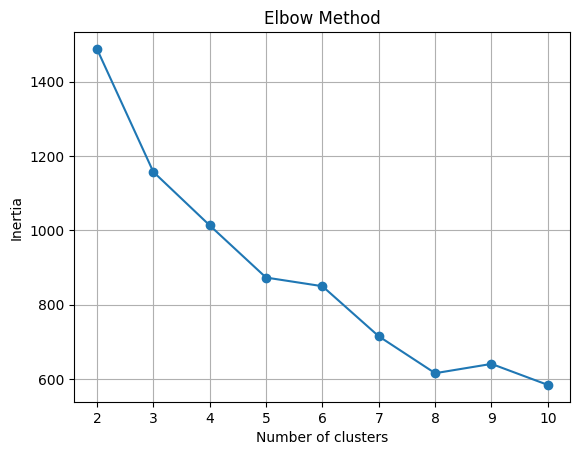

In [23]:
# Clustering
# apply two clustering techniques (K-means clustering, Hierarchical Clustering)
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# Determine the optimal clusters using the elbow method and silhouette score

inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



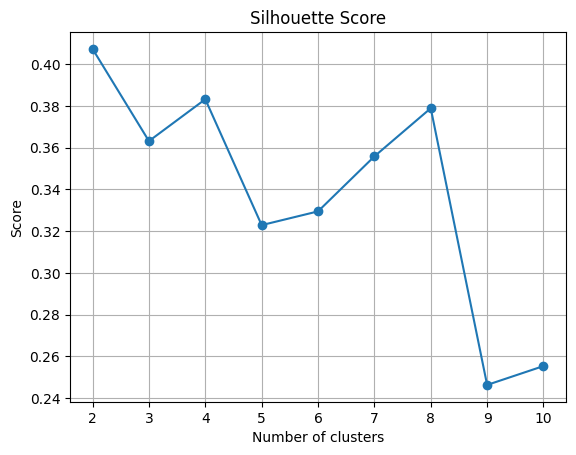

In [24]:
# Silhouette Score
from sklearn.metrics import silhouette_score

sil_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.plot(K, sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.grid(True)
plt.show()



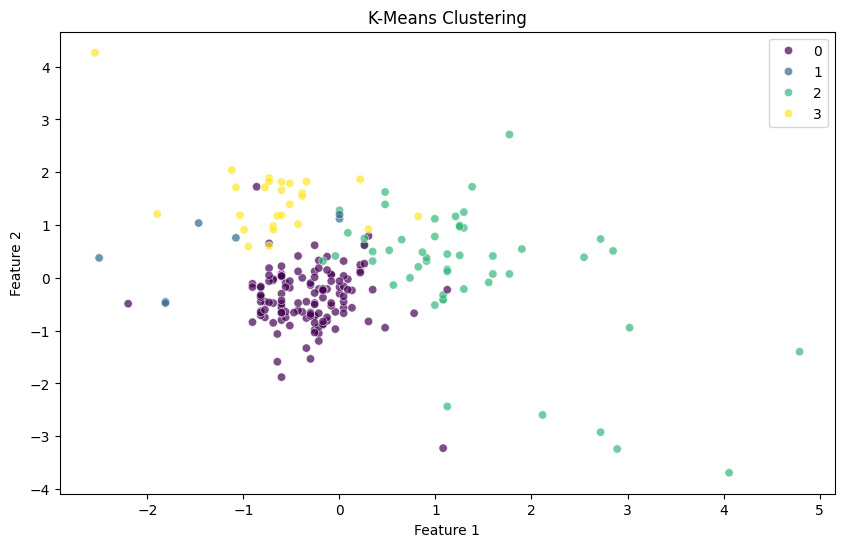

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)
glass_data_df['Cluster'] = labels

# Visualize the clusters formed
plt.figure(8, figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels
                , palette='viridis', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

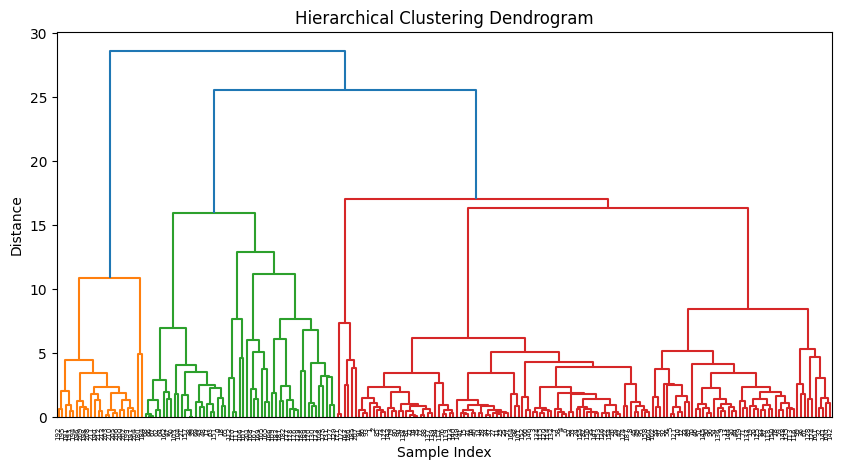

In [26]:
# Using the hierarchical clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=4)
labels_hierarchical = hierarchical_clustering.fit_predict(X_scaled)
glass_data_df['Hierarchical_Cluster'] = labels_hierarchical

# Visualize the clusters formed
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 5))
dendrogram(linkage(X_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

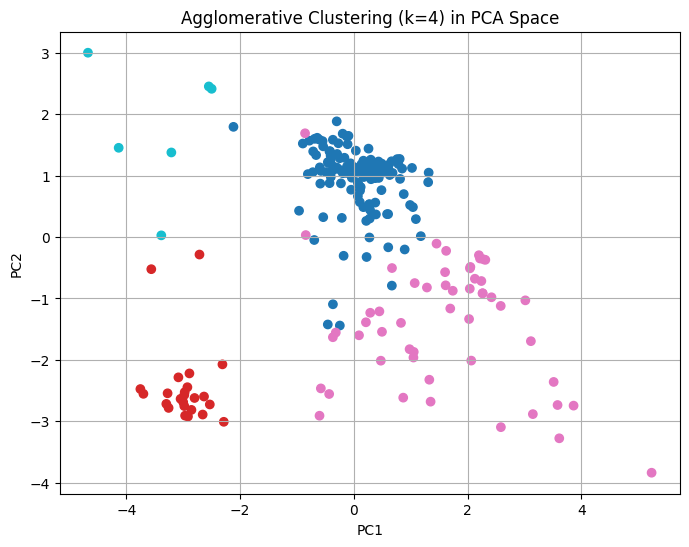

In [30]:
# Task 3: Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hierarchical, cmap='tab10')
plt.title('Agglomerative Clustering (k=4) in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

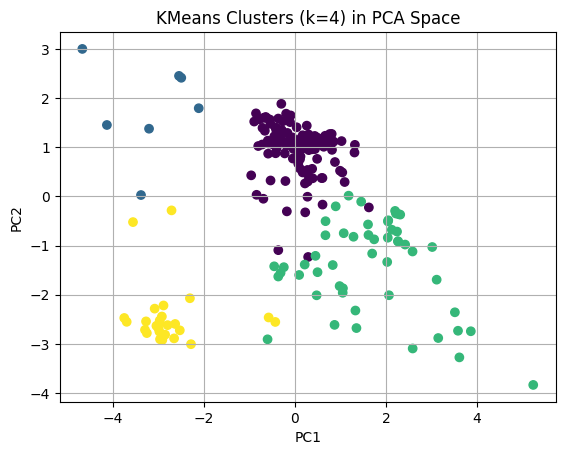

In [31]:
# Using K Means n=4 to visualize clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Clusters (k=4) in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()



**Model Evaluation**

KMeans and Hierarchical clustering were evaluated using Silhouette scores, revealing that KMeans with 2 clusters had the highest cohesion and separation, while Hierarchical clustering with 4 clusters offered a balanced structure consistent with the Elbow method.

**Evaluation Summary**

- KMeans Clustering

  * Best Silhouette Score:
 	- k = 2 → 0.41 (highest score)
 	- k = 4 → 0.39 (strong alternative)
 	- k = 5–6 → 0.32–0.33 (weaker separation)
  * Interpretation:
 - k = 2 yields the most compact and well-separated clusters, ideal for binary segmentation.
 - k = 4 aligns with the Elbow method and offers a good trade-off between separation and structure.
 - Scores drop beyond k = 6, suggesting over-fragmentation or overlapping clusters.

**• 	PCA Visualization:**
  * Clusters are well-separated with minimal overlap

 **Hierarchical Clustering (Ward Linkage)**

- Cluster Count Used: 4 (to match KMeans)
- Silhouette Score: Comparable to KMeans at k = 4 (~0.39)
- Visual Outcome: PCA plot showed distinct groupings with minimal overlap, validating cluster quality.

**Interpretation:**

- Hierarchical clustering captured similar structure to KMeans but revealed more nuanced relationships.
- Dendrogram analysis supports the choice of 4 clusters, showing clear separation at that cut-off.


In [ ]:
# Move notebook into repo
!mv '/content/drive/MyDrive/Colab Notebooks/Assignment 9: Unsupervised Learning.ipynb' '/content/Unsupervised-Learning-tasks'

In [32]:
!git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	Unsupervised-Learning-tasks/
	glass+identification.zip
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git add Assignment 9: Unsupervised Learning.ipynb

In [33]:
!pwd

/content


In [34]:
!ls

glass_data  glass+identification.zip  sample_data  Unsupervised-Learning-tasks
